<a href="https://colab.research.google.com/github/elhamod/BA820/blob/main/Dimensionality_Reduction/Facebook_Metrics_Analysis_Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Course: BA820 - Unsupervised and Unstructured ML**

**Notebook created by: Mohannad Elhamod**

#Facebook Metrics Analysis

In this notebook, we will analyze engagement metrics from Facebook posts to understand how social media data can be summarized. We will examine how compressed representations of post behavior help reveal underlying engagement patterns and support other downstream tasks.

## Load The data

We will load [this](https://archive.ics.uci.edu/dataset/368/facebook+metrics) dataset related to facebook posts from renowned cosmetics brand.
More info about the features can be found [here](https://www.semanticscholar.org/paper/Predicting-social-media-performance-metrics-and-of-Moro-Rita/dec55692590820754b53c916e29bb2b42c0e5104/figure/0).

In [1]:
pip install ucimlrepo

In [2]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import plotly.express as px

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
facebook_metrics = fetch_ucirepo(id=368)

# data (as pandas dataframes)
X = facebook_metrics.data.features
y = facebook_metrics.data.targets

data = pd.concat([X, y], axis=1)
data

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,85093,Photo,3,1,7,2,0.0,4684,7536,733,708,985,4750,2876,392,5,53.0,26.0,84
496,81370,Photo,2,1,5,8,0.0,3480,6229,537,508,687,3961,2104,301,0,53.0,22.0,75
497,81370,Photo,1,1,5,2,0.0,3778,7216,625,572,795,4742,2388,363,4,93.0,18.0,115
498,81370,Photo,3,1,4,11,0.0,4156,7564,626,574,832,4534,2452,370,7,91.0,38.0,136


##EDA and Preprocessing

In [4]:
# Remove nans and null values
df = data.dropna()
df

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,85093,Photo,3,1,7,10,0.0,5400,9218,810,756,1003,5654,3230,422,10,125.0,41.0,176
495,85093,Photo,3,1,7,2,0.0,4684,7536,733,708,985,4750,2876,392,5,53.0,26.0,84
496,81370,Photo,2,1,5,8,0.0,3480,6229,537,508,687,3961,2104,301,0,53.0,22.0,75
497,81370,Photo,1,1,5,2,0.0,3778,7216,625,572,795,4742,2388,363,4,93.0,18.0,115


In [5]:
df.describe()

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
count,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,4.950000e+02,495.000000,495.000000,495.000000,4.950000e+02,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000
mean,123173.268687,1.886869,7.028283,4.133333,7.844444,0.280808,14028.101010,2.985698e+04,926.830303,804.155556,1425.921212,1.691628e+04,6641.355556,614.135354,7.557576,179.145455,27.264646,213.967677
std,16203.818031,0.853268,3.304274,2.030735,4.385064,0.449849,22821.050008,7.714291e+04,987.713267,885.184440,2007.663460,6.007402e+04,7700.266455,614.346297,21.274384,324.412161,42.656388,381.677449
min,81370.000000,1.000000,1.000000,1.000000,1.000000,0.000000,238.000000,5.700000e+02,9.000000,9.000000,9.000000,5.670000e+02,236.000000,9.000000,0.000000,0.000000,0.000000,0.000000
25%,112324.000000,1.000000,4.000000,2.000000,3.000000,0.000000,3331.000000,5.798000e+03,399.000000,335.000000,512.500000,4.073500e+03,2213.000000,297.500000,1.000000,57.000000,10.000000,72.000000
50%,129600.000000,2.000000,7.000000,4.000000,9.000000,0.000000,5290.000000,9.084000e+03,630.000000,555.000000,861.000000,6.282000e+03,3478.000000,416.000000,3.000000,101.000000,19.000000,125.000000
75%,136393.000000,3.000000,10.000000,6.000000,11.000000,1.000000,13248.000000,2.250300e+04,1062.000000,969.000000,1479.000000,1.514300e+04,8018.000000,658.500000,7.000000,188.000000,32.500000,231.000000
max,139441.000000,3.000000,12.000000,7.000000,23.000000,1.000000,180480.000000,1.110282e+06,11452.000000,11328.000000,19779.000000,1.107833e+06,51456.000000,4376.000000,372.000000,5172.000000,790.000000,6334.000000


Let's pay close attention to categorical variables

In [6]:
# This helps us figure out how many unique values are there per feature.
# This is especially useful for categorical features
for col in df.columns:
    print(f"{col}: {len(df[col].unique())}")

Page total likes: 90
Type: 4
Category: 3
Post Month: 12
Post Weekday: 7
Post Hour: 22
Paid: 2
Lifetime Post Total Reach: 481
Lifetime Post Total Impressions: 489
Lifetime Engaged Users: 411
Lifetime Post Consumers: 418
Lifetime Post Consumptions: 436
Lifetime Post Impressions by people who have liked your Page: 487
Lifetime Post reach by people who like your Page: 464
Lifetime People who have liked your Page and engaged with your post: 378
comment: 46
like: 257
share: 88
Total Interactions: 280


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 495 entries, 0 to 498
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     495 non-null    int64  
 1   Type                                                                 495 non-null    object 
 2   Category                                                             495 non-null    int64  
 3   Post Month                                                           495 non-null    int64  
 4   Post Weekday                                                         495 non-null    int64  
 5   Post Hour                                                            495 non-null    int64  
 6   Paid                                                                 495 non-null    float64
 7   Lifetime Post

In [8]:
# Convert Paid and Category features to categorical
df["Paid"] = df["Paid"].astype("category")
df["Category"] = df["Category"].astype("category")

#get df_numerical
df_numeric = df.select_dtypes(include=[float, int])
df_numeric

/tmp/ipython-input-1468815756.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Paid"] = df["Paid"].astype("category")
/tmp/ipython-input-1468815756.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Category"] = df["Category"].astype("category")


,Page total likes,Post Month,Post Weekday,Post Hour,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,12,4,3,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,12,3,10,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,12,3,3,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,12,2,10,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,12,2,3,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,85093,1,7,10,5400,9218,810,756,1003,5654,3230,422,10,125.0,41.0,176
495,85093,1,7,2,4684,7536,733,708,985,4750,2876,392,5,53.0,26.0,84
496,81370,1,5,8,3480,6229,537,508,687,3961,2104,301,0,53.0,22.0,75
497,81370,1,5,2,3778,7216,625,572,795,4742,2388,363,4,93.0,18.0,115


In [9]:
# Normalize the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_numeric_normalized = pd.DataFrame(sc.fit_transform(df_numeric), columns = df_numeric.columns)
df_numeric_normalized.describe()

,Page total likes,Post Month,Post Weekday,Post Hour,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
count,495.000000,4.950000e+02,4.950000e+02,4.950000e+02,4.950000e+02,4.950000e+02,4.950000e+02,495.000000,4.950000e+02,4.950000e+02,4.950000e+02,4.950000e+02,4.950000e+02,4.950000e+02,4.950000e+02,4.950000e+02
mean,0.000000,1.722528e-16,-1.866072e-16,4.306320e-17,-1.435440e-17,-1.435440e-17,-5.741759e-17,0.000000,-4.306320e-17,-2.870880e-17,-5.741759e-17,8.253779e-17,1.973730e-17,-1.794300e-17,3.588600e-18,-9.868649e-18
std,1.001012,1.001012e+00,1.001012e+00,1.001012e+00,1.001012e+00,1.001012e+00,1.001012e+00,1.001012,1.001012e+00,1.001012e+00,1.001012e+00,1.001012e+00,1.001012e+00,1.001012e+00,1.001012e+00,1.001012e+00
min,-2.582451,-1.826235e+00,-1.544516e+00,-1.562433e+00,-6.048824e-01,-3.800299e-01,-9.301878e-01,-0.899202,-7.064703e-01,-2.724275e-01,-8.326771e-01,-9.860034e-01,-3.556024e-01,-5.527742e-01,-6.398157e-01,-5.611653e-01
25%,-0.670227,-9.174016e-01,-1.051585e+00,-1.105878e+00,-4.692125e-01,-3.121910e-01,-5.349369e-01,-0.530545,-4.554276e-01,-2.139988e-01,-5.756730e-01,-5.159235e-01,-3.085499e-01,-3.768941e-01,-4.051471e-01,-3.723335e-01
50%,0.397020,-8.568127e-03,-6.572408e-02,2.637874e-01,-3.832839e-01,-2.695516e-01,-3.008268e-01,-0.281758,-2.816671e-01,-1.771987e-01,-4.112268e-01,-3.228404e-01,-2.144451e-01,-2.411269e-01,-1.939453e-01,-2.333323e-01
75%,0.816666,9.002654e-01,9.201371e-01,7.203424e-01,-3.421798e-02,-9.542577e-02,1.369896e-01,0.186414,2.646484e-02,-2.954809e-02,1.789597e-01,7.228745e-02,-2.623530e-02,2.732173e-02,1.228573e-01,4.467006e-02
max,1.004960,1.506154e+00,1.413068e+00,3.459673e+00,7.301167e+00,1.401967e+01,1.066688e+01,11.900899,9.150759e+00,1.817791e+01,5.825770e+00,6.129556e+00,1.714790e+01,1.540604e+01,1.789901e+01,1.605079e+01


Plot correlations

<Axes: >

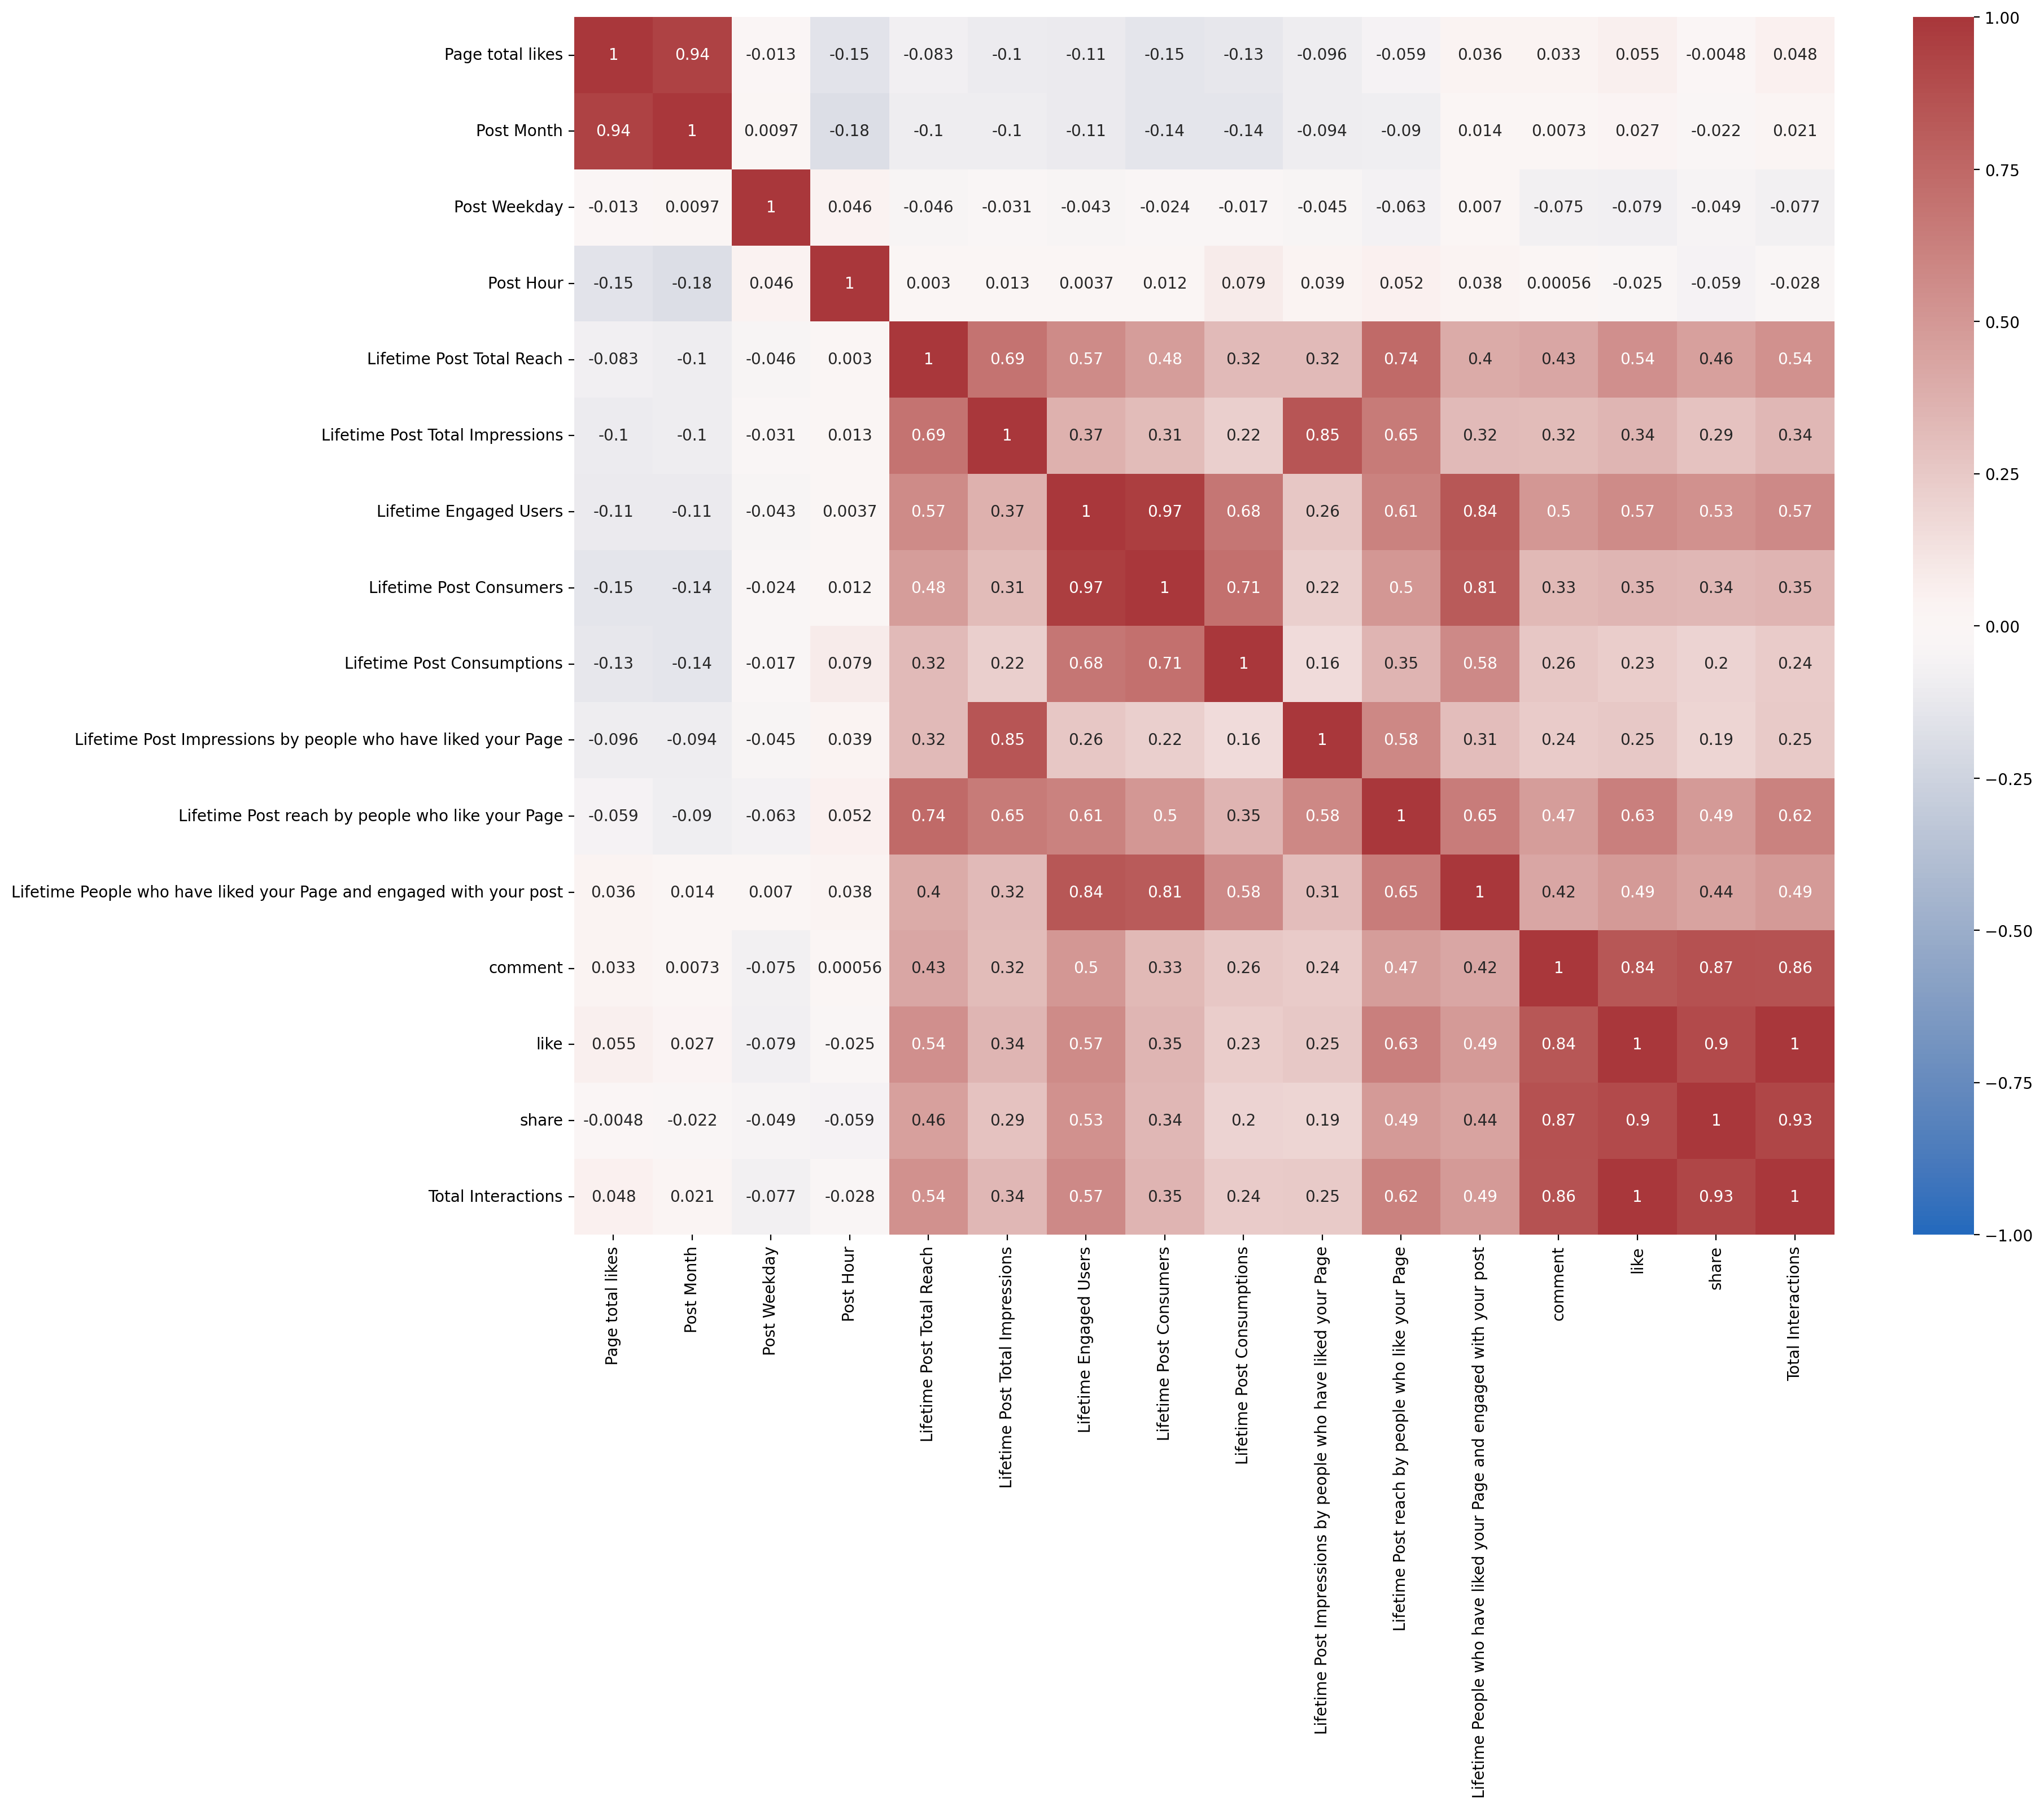

In [10]:
corr = df_numeric_normalized.corr(numeric_only=True)

plt.figure(figsize=(18, 14), dpi=200)  # Bigger + HD
sns.heatmap(corr, annot=True, cmap="vlag" , vmin=-1, vmax=1)

Pairplot with categories

<Figure size 7200x5600 with 0 Axes>

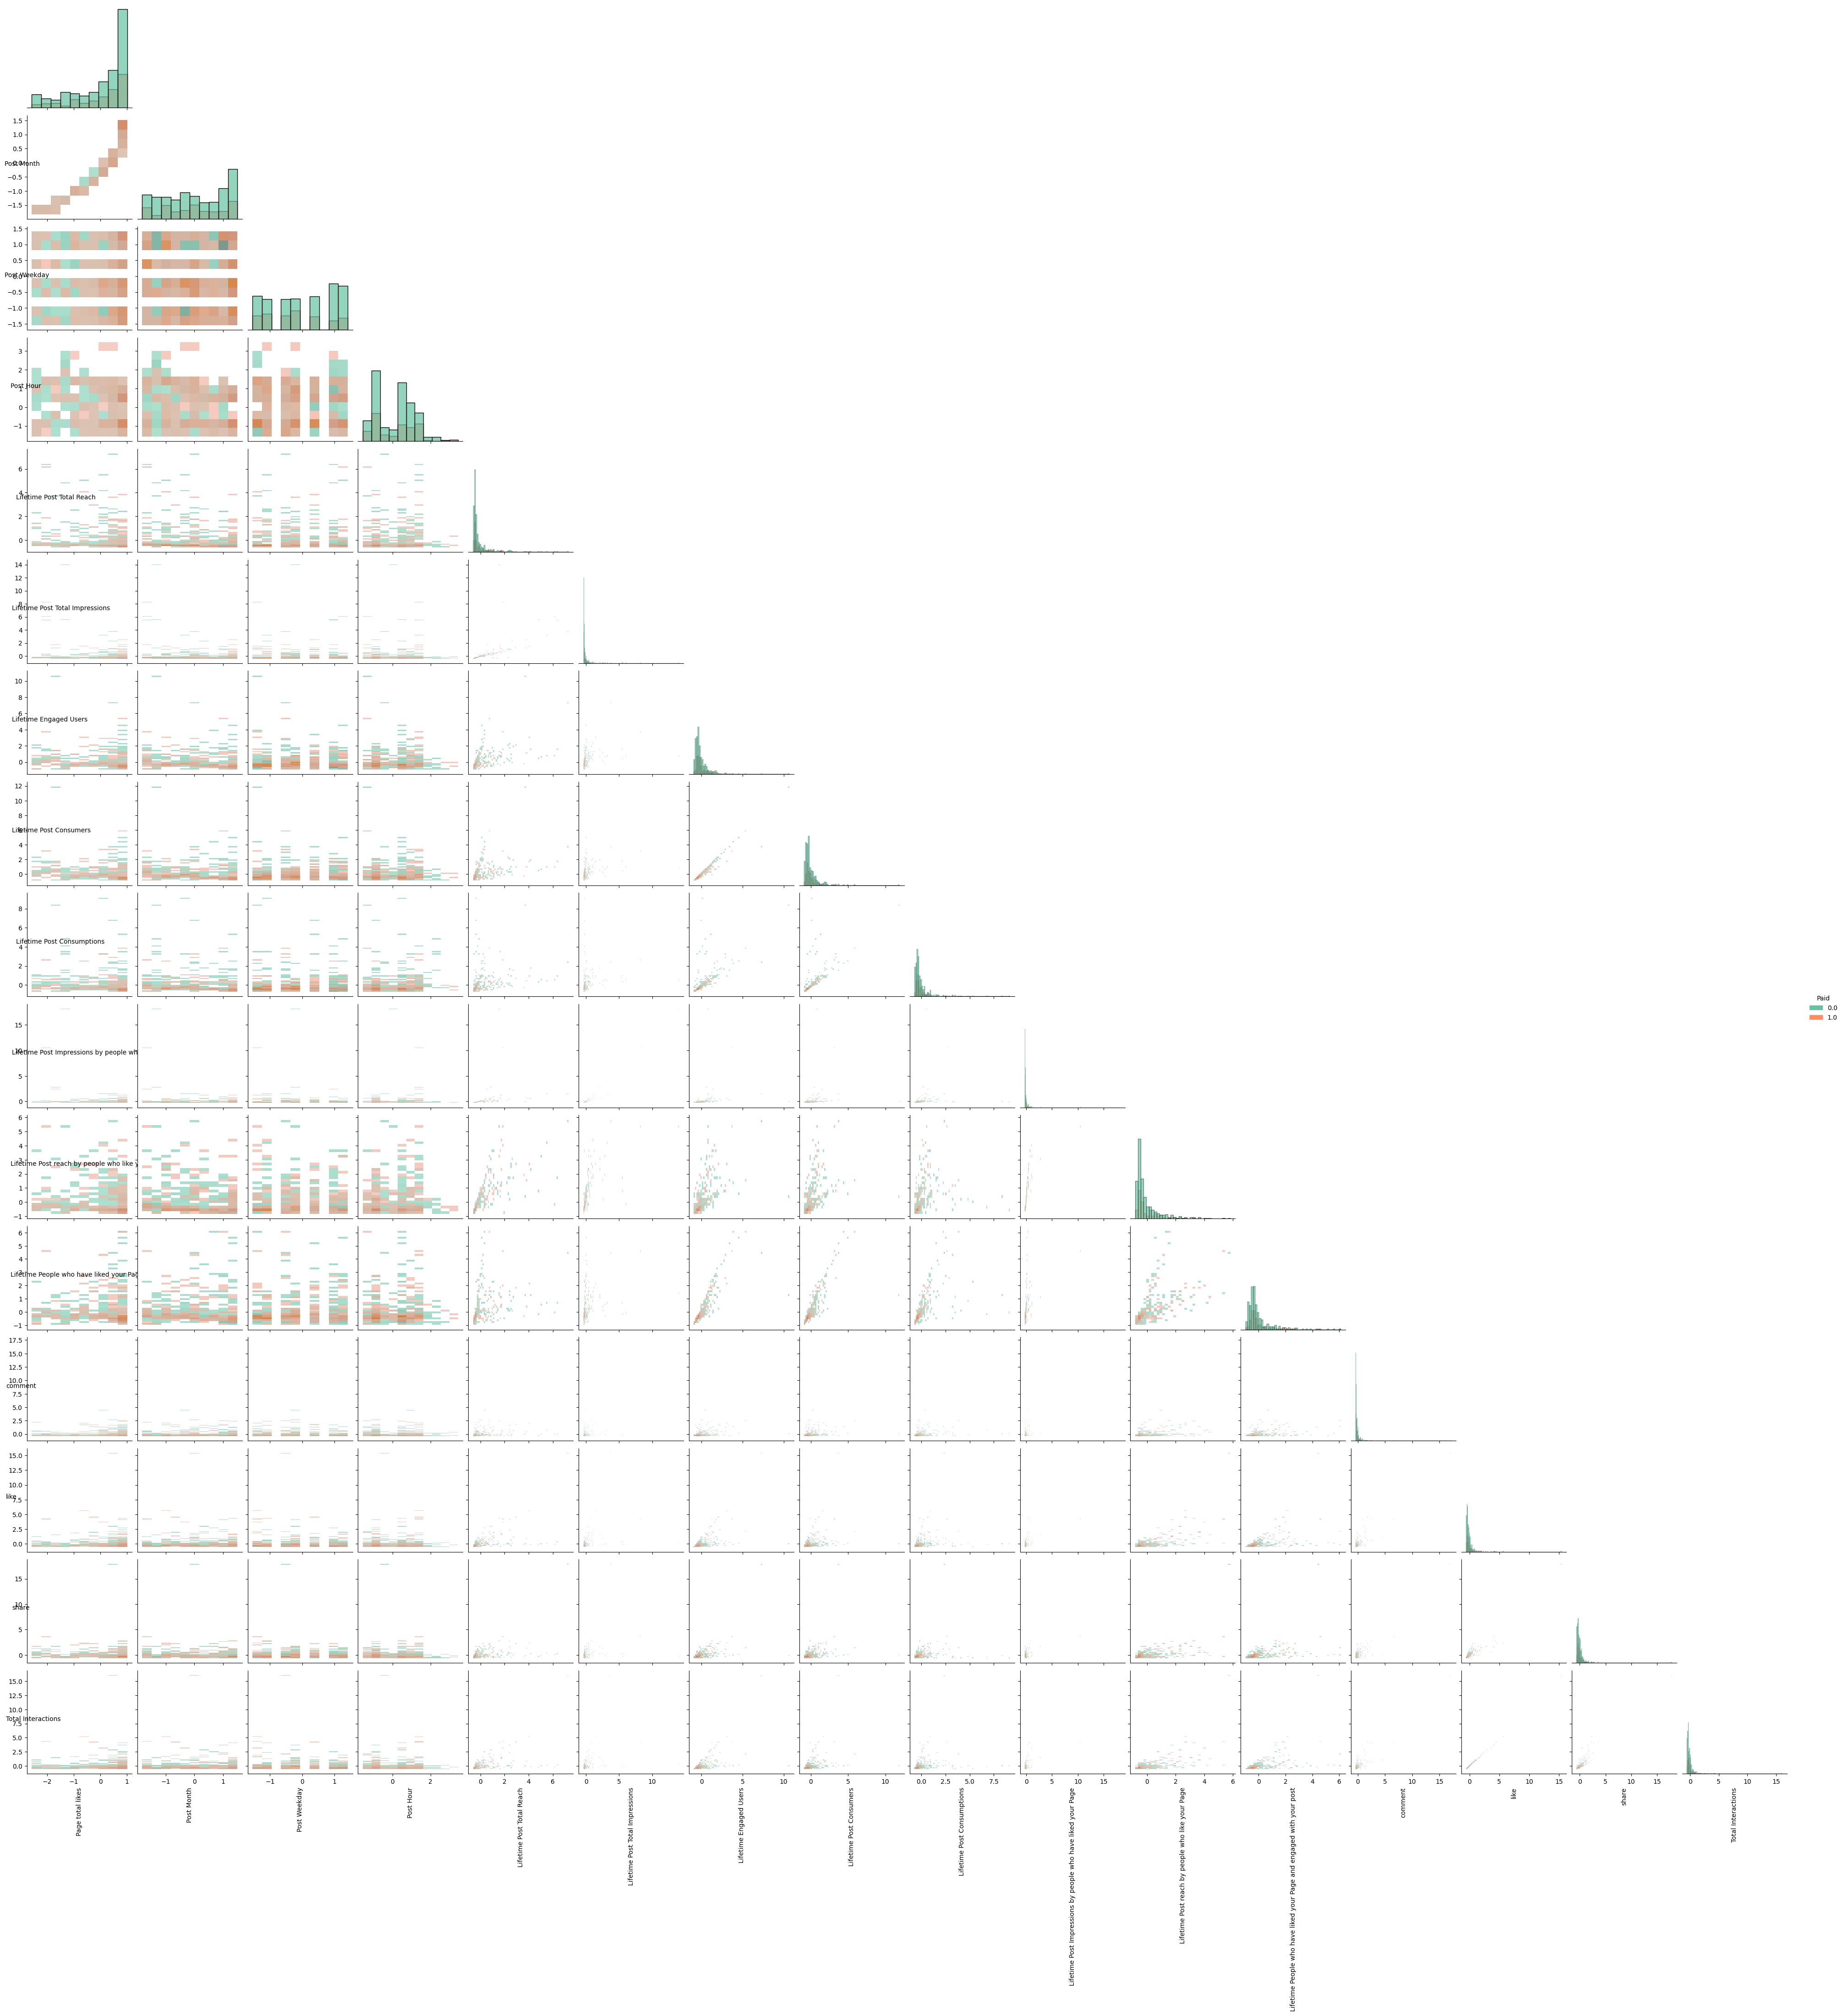

In [11]:
# Show pairplots of numeric dataframe, with one of the categorical columns as a coloring

df_normalized = df.copy()
df_normalized[df_numeric.columns] = df_numeric_normalized

plt.figure(figsize=(36, 28), dpi=200)  # Bigger + HD
g = sns.pairplot(df_normalized, kind="hist", corner=True, palette="Set2", hue="Paid",  # Type Category
    plot_kws={'alpha': 0.7}, # Adjusts transparency of the scatter points (0.0 to 1.0)
    diag_kws={'alpha': 0.7}  # Adjusts transparency of the diagonal plots (histograms/KDEs)
)

for ax in g.axes.flatten():
    if ax is None:
        continue

    # x-axis label: vertical (perpendicular to x-axis)
    ax.xaxis.label.set_rotation(90)

    # y-axis label: horizontal (perpendicular to y-axis)
    ax.yaxis.label.set_rotation(0)

    ax.xaxis.label.set_ha('center')
    ax.yaxis.label.set_ha('left')

Boxplots of categories vs. numerical features.

In [12]:
df_normalized.columns

Index(['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday',
       'Post Hour', 'Paid', 'Lifetime Post Total Reach',
       'Lifetime Post Total Impressions', 'Lifetime Engaged Users',
       'Lifetime Post Consumers', 'Lifetime Post Consumptions',
       'Lifetime Post Impressions by people who have liked your Page',
       'Lifetime Post reach by people who like your Page',
       'Lifetime People who have liked your Page and engaged with your post',
       'comment', 'like', 'share', 'Total Interactions'],
      dtype='object')

/tmp/ipython-input-2716657799.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




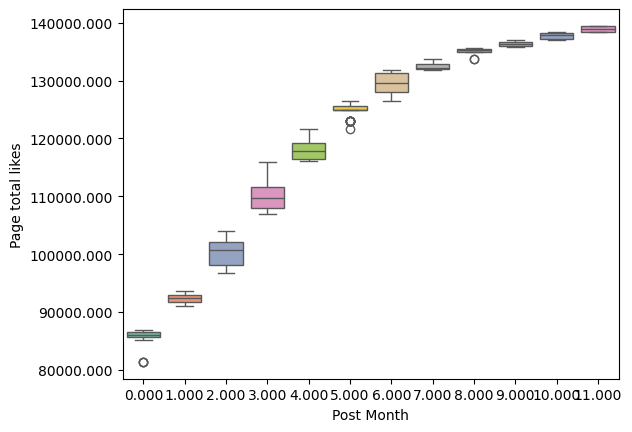

In [17]:
ax = sns.boxplot(data=df, x='Post Month', y="Page total likes", palette="Set2")

ax.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))


Scatter plots could also be useful

In [18]:
# scatter plot
fig = px.scatter(df, x="Page total likes", y="Lifetime Post Total Impressions", color="Paid")
fig.show()

##**Questions**

### Q1. Find the two *distinct* primary drivers of variation in user engagement across posts and interpret them in plain English.

###Q2. You want to profile and segment the different Facebook *pages* in this dataset. Can applying dimensionality reduction improve the quality and interpretability of your segmentation? Justify your answer.

###Q3. You are interested in identifying posts that behave very differently from the majority of posts in the dataset and understanding what makes them different. Describe how you identified these posts and explain the underlying reasons for their behavior.

###Q4. You want to *visually* inspect how posts differ from one another and communicate these differences to executives in an intuitive way. Propose two visualization approaches, describe what each reveals, and explain how an executive should interpret the results.

###Q5. At the end of June, you were asked to build a model predicting the total number of engaged users for a post. Compare the model's performance on posts from the second half of the year when trained on original features versus a compressed representation of the data. Explain the results.

###Q6. You want to create a facebook feature that, *at the time of posting*, predicts *"Lifetime post reach to those who **do not** like your page"*. Clearly describe the steps you take and justify your modeling choices.

###Q7. How many *constructed* features do you need to be able to predict a post's total interactions. Explain why logically and empirically.

###Q8. Which attributes tend to boost a post's reach to page non-followers ?